In [31]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data_path = '../../../Model Prediction/data/output/normalized_data_X.csv'
y_path = '../../../Model Prediction/data/output/y.csv'
preds_path = '../../../Model Prediction/data/output/Output_Stacking_RF_XG_CB_testY_pred.csv'
file_path = '../data/input/new_feats_data.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
preds = pd.read_csv(preds_path)
data_no_normalized = pd.read_csv(file_path)
print(data.shape)
print(y.shape)
print(preds.shape)
print(data_no_normalized.shape)
data.head()

(1432633, 420)
(1432633, 1)
(286527, 3)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.066667,0.085019,0.264600,0.496150,0.057584,0.0,0.000000,0.266155,0.496047,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.118068,0.066667,0.085026,0.270218,0.501802,0.064231,0.0,0.000148,0.271812,0.501642,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.066667,0.085033,0.273653,0.505296,0.068301,0.0,0.000000,0.275187,0.505192,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.118068,0.066667,0.085039,0.277433,0.509404,0.072900,0.0,0.000149,0.280622,0.510132,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.118068,0.066667,0.085053,0.280050,0.513166,0.077983,0.0,0.000155,0.281878,0.513178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
preds

,Unnamed: 0,busBunching,predStack
0,341586,0.0,0.0
1,573490,1.0,1.0
2,50737,0.0,0.0
3,840747,0.0,0.0
4,796060,0.0,0.0
...,...,...,...
286522,1421784,0.0,0.0
286523,514588,1.0,0.0
286524,1169290,0.0,0.0
286525,1023921,0.0,0.0


In [4]:
wrong_preds = preds[preds.busBunching != preds.predStack][['busBunching', 'predStack']]
wrong_preds

,busBunching,predStack
14,1.0,0.0
41,1.0,0.0
43,1.0,0.0
59,1.0,0.0
67,1.0,0.0
...,...,...
286430,1.0,0.0
286437,0.0,1.0
286464,0.0,1.0
286475,0.0,1.0


In [5]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

In [6]:
test_X

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
341586,0.107335,0.033333,0.071826,0.346776,0.236440,0.318209,0.009805,0.000000,0.348148,0.236391,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
573490,0.159213,0.166667,0.169254,0.311311,0.682637,0.211963,0.547280,0.409271,0.312693,0.682928,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
50737,0.094812,0.166667,0.053983,0.218755,0.660467,0.114111,0.000686,0.000000,0.220411,0.660330,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
840747,0.159213,0.033333,0.167024,0.274951,0.673379,0.303974,0.554026,0.000000,0.276483,0.673239,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
796060,0.148479,0.166667,0.998696,0.207833,0.816723,0.203822,0.553783,0.000000,0.209513,0.816554,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421784,0.243292,0.200000,0.262377,0.369928,0.914845,0.093368,0.999571,0.967635,0.371106,0.914461,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
514588,0.150268,0.066667,0.126748,0.245814,0.686698,0.233051,0.544979,0.000000,0.247410,0.686556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1169290,0.286225,0.000000,0.314352,0.567499,0.741136,0.032150,0.993168,0.321107,0.568932,0.741426,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1023921,0.221825,0.266667,0.234456,0.432817,0.843645,0.078535,0.988323,0.000000,0.434000,0.843471,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
test_Y

,busBunching
341586,0.0
573490,1.0
50737,0.0
840747,0.0
796060,0.0
...,...
1421784,0.0
514588,1.0
1169290,0.0
1023921,0.0


In [13]:
test_X['busBunching'] = test_Y
test_X['preds'] = preds['predStack'].values

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
preds['predStack']

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
286522    0.0
286523    0.0
286524    0.0
286525    0.0
286526    0.0
Name: predStack, Length: 286527, dtype: float64

In [11]:
preds['busBunching']

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
286522    0.0
286523    1.0
286524    0.0
286525    0.0
286526    0.0
Name: busBunching, Length: 286527, dtype: float64

In [14]:
test_X[['busBunching', 'preds']]

,busBunching,preds
341586,0.0,0.0
573490,1.0,1.0
50737,0.0,0.0
840747,0.0,0.0
796060,0.0,0.0
...,...,...
1421784,0.0,0.0
514588,1.0,0.0
1169290,0.0,0.0
1023921,0.0,0.0


In [16]:
right_preds = test_X[test_X.busBunching == test_X.preds][['busBunching', 'preds']]
right_preds

,busBunching,preds
341586,0.0,0.0
573490,1.0,1.0
50737,0.0,0.0
840747,0.0,0.0
796060,0.0,0.0
...,...,...
82602,0.0,0.0
1421784,0.0,0.0
1169290,0.0,0.0
1023921,0.0,0.0


In [17]:
len(right_preds) / len(test_X)

0.9517881386396395

In [18]:
wrong_preds = test_X[test_X.busBunching != test_X.preds][['busBunching', 'preds']]
wrong_preds

,busBunching,preds
1344158,1.0,0.0
505668,1.0,0.0
556359,1.0,0.0
165934,1.0,0.0
1071663,1.0,0.0
...,...,...
1022556,1.0,0.0
723870,0.0,1.0
470360,0.0,1.0
937749,0.0,1.0


In [19]:
len(wrong_preds) / len(test_X)

0.04821186136036045

In [20]:
fn_preds = wrong_preds[wrong_preds.preds == 0.0][['busBunching', 'preds']]
fn_preds

,busBunching,preds
1344158,1.0,0.0
505668,1.0,0.0
556359,1.0,0.0
165934,1.0,0.0
1071663,1.0,0.0
...,...,...
261633,1.0,0.0
567209,1.0,0.0
248434,1.0,0.0
1022556,1.0,0.0


In [21]:
len(fn_preds) / len(test_X)

0.037860306358563064

In [30]:
fn_preds.index.sort_values()

Int64Index([    280,     495,    1644,    1792,    2489,    4769,    4770,
               4828,    5555,    5558,
            ...
            1428779, 1429027, 1429432, 1429680, 1429683, 1429690, 1429795,
            1430513, 1432512, 1432626],
           dtype='int64', length=10848)

In [28]:
data_no_normalized_fn = data_no_normalized[data_no_normalized.index.isin(fn_preds.index)]
data_no_normalized_fn

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,MONTH(alertDateTimeSB),MONTH(jamUpdateDateTimeSB),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(gps_datetimeSB),WEEKDAY(precipitationTimeSB),WEEKDAY(alertDateTimeSB),WEEKDAY(jamUpdateDateTimeSB)
280,68,8,Route_161,low_frequency,12673,-8.052737,-34.916621,5130.0,12021,NaN,...,12,12,4,4,4,4,4,4,4,4
495,68,7,Route_161,low_frequency,12684,-8.035158,-34.948775,9174.0,12021,1285.0,...,12,12,3,3,3,3,3,3,3,3
1644,68,8,Route_161,low_frequency,12659,-8.054250,-34.895989,2344.0,12021,NaN,...,12,12,4,4,4,4,4,4,4,4
1792,68,8,Route_161,low_frequency,12659,-8.054250,-34.895989,2344.0,12021,647.0,...,12,12,6,6,6,6,6,6,6,6
2489,68,6,Route_160,low_frequency,12569,-8.036406,-34.978267,457.0,12021,NaN,...,12,12,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429690,140,3,Route_325,low_frequency,40327,-7.947017,-34.877889,14977.0,81981,406041.0,...,12,12,5,5,5,5,5,5,5,5
1429795,140,6,Route_325,low_frequency,40152,-8.045376,-34.875356,2599.0,81981,NaN,...,12,12,5,5,5,5,5,5,5,5
1430513,138,3,Route_320,low_frequency,38748,-7.969890,-34.846680,11.0,81987,672762.0,...,12,12,1,1,1,1,1,1,1,1
1432512,138,7,Route_321,low_frequency,39108,-7.998893,-34.845632,10126.0,81987,673116.0,...,12,12,1,1,1,1,1,1,1,1


/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


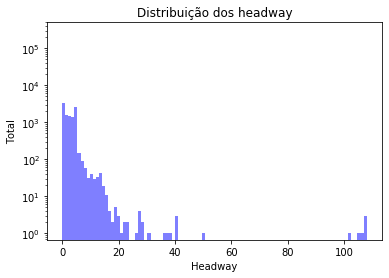

In [33]:
num_bins = 100
plt.hist(data_no_normalized_fn.headway, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.ylim([0, 500000])
plt.xlabel('Headway')
plt.ylabel('Total')
plt.title('Distribuição dos headway')
plt.show()

In [35]:
# esses 29 casos podem ter sido erro da base e o modelo acertou
data_no_normalized_fn[data_no_normalized_fn.headway >= 20][['headway', 'headwayThreshold', 'busBunching']]

,headway,headwayThreshold,busBunching
37644,37,95,True
37645,38,95,True
65369,20,31,True
81588,102,108,True
83943,28,37,True
84012,29,37,True
84053,29,32,True
84058,31,32,True
84063,28,32,True
84078,27,53,True


In [36]:
data_no_normalized_fn[data_no_normalized_fn.headway < 20][['headway', 'headwayThreshold', 'busBunching']]

,headway,headwayThreshold,busBunching
280,3,4,True
495,4,4,True
1644,4,4,True
1792,0,4,True
2489,2,2,True
...,...,...,...
1429690,1,3,True
1429795,5,5,True
1430513,4,5,True
1432512,3,5,True


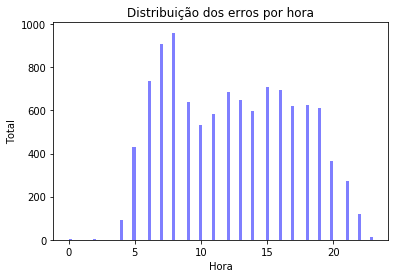

In [39]:
num_bins = 100
plt.hist(data_no_normalized_fn.GPShour, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Hora')
plt.ylabel('Total')
plt.title('Distribuição dos erros por hora')
plt.show()

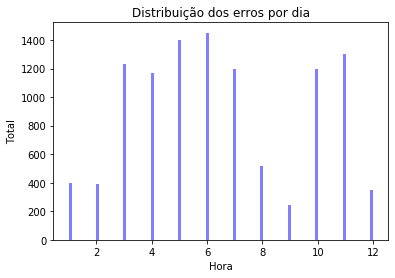

In [44]:
num_bins = 100
plt.hist(data_no_normalized_fn['DAY(gps_datetime)'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Hora')
plt.ylabel('Total')
plt.title('Distribuição dos erros por dia')
plt.show()

In [41]:
print("Quantidade de ônibus diferentes com erro:")
print(data_no_normalized_fn.groupby(['busCode'])['busCode'].nunique().count())

print("Quantidade de ônibus diferentes:")
print(data_no_normalized.groupby(['busCode'])['busCode'].nunique().count())

print("Quantidade de rotas diferentes com erro:")
print(data_no_normalized_fn.groupby(['route'])['route'].nunique().count())

print("Quantidade de rotas diferentes:")
print(data_no_normalized.groupby(['route'])['route'].nunique().count())

Quantidade de ônibus diferentes com erro:
699
Quantidade de ônibus diferentes:
789
Quantidade de rotas diferentes com erro:
100
Quantidade de rotas diferentes:
106


In [42]:
data_no_normalized_fn.to_csv('../../../Model Prediction/data/output/data_no_normalized_fn.csv', index=False)